## XGBoost

In [ ]:
#pip install xgboost

RMSE: 1502854.0658392615


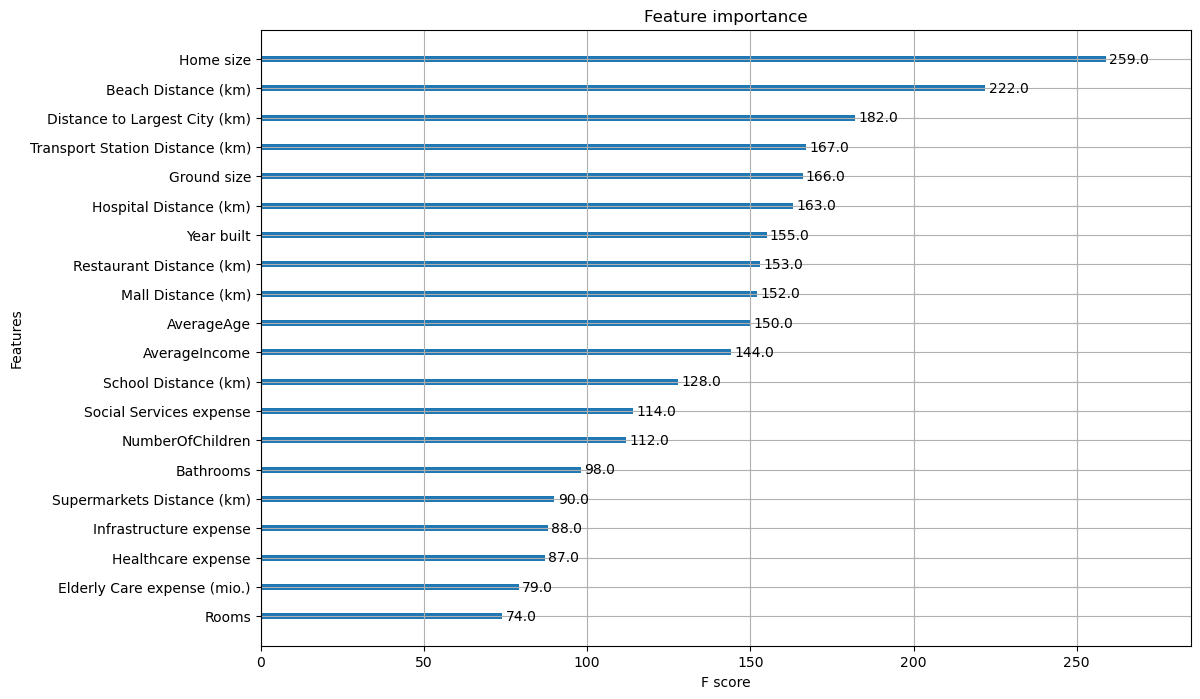

In [26]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


# Indlæs data
data = pd.read_csv('CSV files/Boligsiden_med_årnu.csv')

# Konverter numeriske kolonner
data['Home size'] = pd.to_numeric(data['Home size'], errors='coerce')
data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')
if data['Ground size'].dtype == 'object':
    data['Ground size'] = pd.to_numeric(data['Ground size'].str.replace(' m²', ''), errors='coerce')
else:
    data['Ground size'] = pd.to_numeric(data['Ground size'], errors='coerce')

# Konverter 'Energy label' til numerisk ved hjælp af LabelEncoder
label_encoder = LabelEncoder()
data['Energy label'] = label_encoder.fit_transform(data['Energy label'])

# Fjern rækker med manglende værdier
data.dropna(inplace=True)

# Fjern eventuelle gentagne kolonner fra X
X = data[['Beach Distance (km)', 'Restaurant Distance (km)','Distance to Largest City (km)',
         'Transport Station Distance (km)','Hospital Distance (km)', 'Home size', 'Rooms', 'Supermarkets Distance (km)',
         'Bathrooms', 'Mall Distance (km)', 'School Distance (km)','AverageAge','Infrastructure expense',
         'NumberOfChildren','Healthcare expense', 'AverageIncome','Social Services expense','Elderly Care expense (mio.)',
         'Ground size','Year built']]
y = data['Price']


# Split data i trænings- og test-sæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Initialiser en XGBoost Regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100, enable_categorical=True)

# Træn modellen
xg_reg.fit(X_train, y_train)

# Lav forudsigelser
y_pred = xg_reg.predict(X_test)

# Beregn RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

xgb.plot_importance(xg_reg)
plt.gcf().set_size_inches(12, 8) 
plt.savefig("Pictures/XGBOOST.png", dpi=200, bbox_inches='tight')
plt.show()

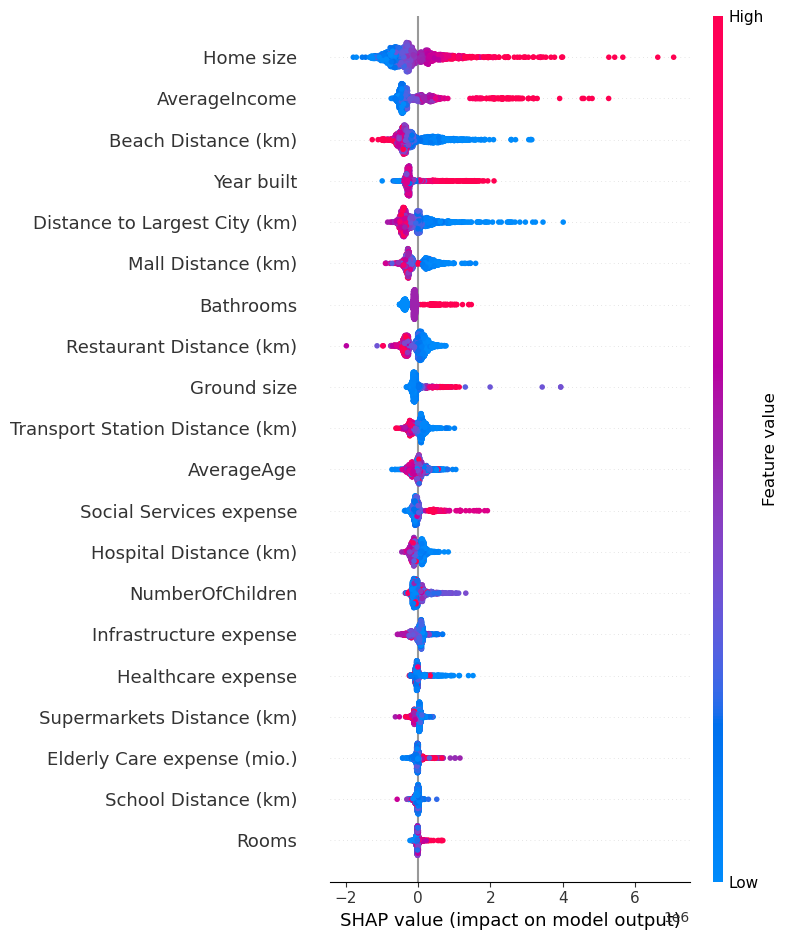

In [27]:
import shap
import matplotlib.pyplot as plt

# Beregn SHAP-værdier
explainer = shap.Explainer(xg_reg, X_train)
shap_values = explainer(X_test)

# Opret SHAP-summary plot
plt.figure()  # Opretter en ny figur
shap.summary_plot(shap_values, X_test, show=False)  # show=False forhindrer plottet i at blive vist med det samme

# Gem plottet som en PNG-fil
plt.savefig('Pictures/shap_summary_plot.png', bbox_inches='tight')

# Vis plottet i Python
plt.show()

# Luk figuren for at undgå overlappende plots i fremtidige plots
plt.close()


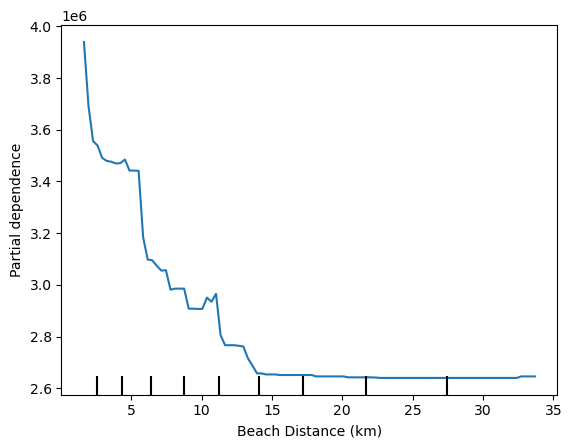

In [6]:
from sklearn.inspection import PartialDependenceDisplay

# Generér partial dependence plots for udvalgte features
PartialDependenceDisplay.from_estimator(xg_reg, X_train, features=['Beach Distance (km)',])

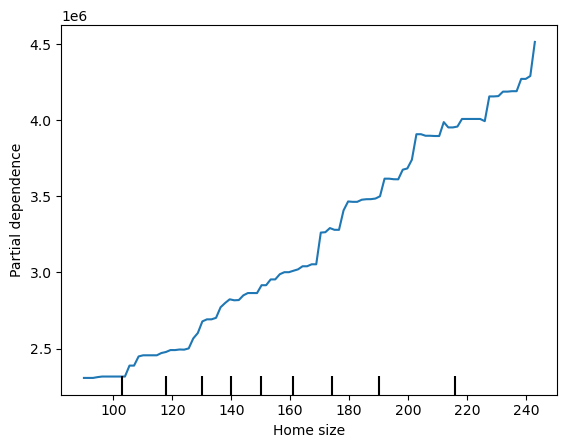

In [7]:
PartialDependenceDisplay.from_estimator(xg_reg, X_train, features=['Home size',])

RMSE: 1320805.0020885812


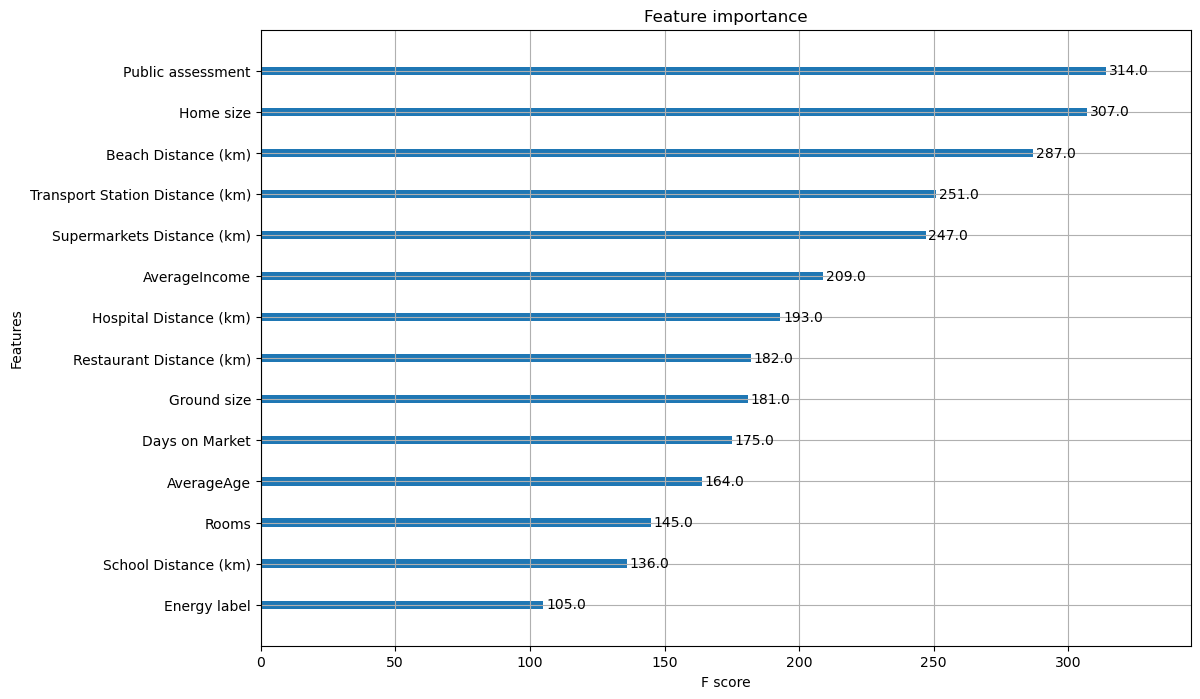

In [4]:
# Model 4 
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


# Indlæs data
data = pd.read_csv('CSV files/Boligsiden_med_årnu.csv')

# Konverter numeriske kolonner
data['Home size'] = pd.to_numeric(data['Home size'], errors='coerce')
data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')
if data['Ground size'].dtype == 'object':
    data['Ground size'] = pd.to_numeric(data['Ground size'].str.replace(' m²', ''), errors='coerce')
else:
    data['Ground size'] = pd.to_numeric(data['Ground size'], errors='coerce')

# Konverter 'Energy label' til numerisk ved hjælp af LabelEncoder
label_encoder = LabelEncoder()
data['Energy label'] = label_encoder.fit_transform(data['Energy label'])

# Fjern rækker med manglende værdier
data.dropna(inplace=True)

data = data.rename(columns={'Off. vurdering': 'Public assessment'})



# Fjern eventuelle gentagne kolonner fra X
X = data[[ 'Rooms', 'Days on Market' , 'Public assessment','Home size', 
                             'Ground size', 'AverageAge', 'AverageIncome', 
                             'Transport Station Distance (km)', 'Beach Distance (km)', 'School Distance (km)', 
                             'Restaurant Distance (km)', 'Hospital Distance (km)', 
                             'Supermarkets Distance (km)', 'Energy label']]
y = data['Price']


# Split data i trænings- og test-sæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Initialiser en XGBoost Regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100, enable_categorical=True)

# Træn modellen
xg_reg.fit(X_train, y_train)

# Lav forudsigelser
y_pred = xg_reg.predict(X_test)

# Beregn RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

xgb.plot_importance(xg_reg)
plt.gcf().set_size_inches(12, 8) 
plt.savefig("Pictures/XGBOOST_model_4.png", dpi=200, bbox_inches='tight')
plt.show()

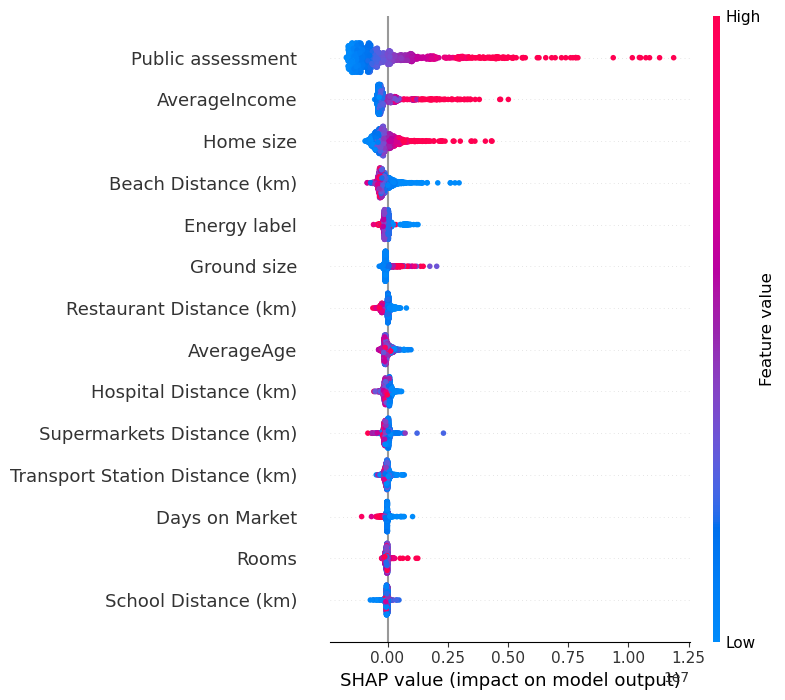

In [6]:
import shap

# Beregn SHAP-værdier
explainer = shap.Explainer(xg_reg, X_train)
shap_values = explainer(X_test)

# Plot feature importance baseret på SHAP-værdier
shap.summary_plot(shap_values, X_test)